<a href="https://colab.research.google.com/github/mkap007/Advancepy_SIG/blob/main/Assignment_1_Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1><b>1. Write a program to read Indian state boundary shape file and compute the area as well as get the boundary and centroid of each state and plot the same.</b></h1>

In [29]:
#!pip install geodatasets

In [30]:
import geopandas as gpd
from geodatasets import get_path

**importing Data and Reading Dataset**

In [31]:
ind = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Geopandas/INDIA_states.shp")

ind.head(5)

,ST_NAME,geometry
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((92.89889 12.91583, 92.89917 12..."
1,Andhra Pradesh,"POLYGON ((83.94319 18.21431, 83.94236 18.21431..."
2,Arunachal Pradesh,"POLYGON ((94.86086 27.73948, 94.86603 27.73624..."
3,Assam,"POLYGON ((95.59917 27.22961, 95.59009 27.22952..."
4,Bihar,"POLYGON ((87.95561 25.53805, 87.95239 25.53646..."


**Setting Index**

In [32]:
gdf = ind.set_index('ST_NAME')

**Area Calculation**

In [33]:
gdf["Area"] = gdf.area
print(gdf["Area"])

ST_NAME
ANDAMAN AND NICOBAR ISLANDS     0.630493
Andhra Pradesh                 23.315352
Arunachal Pradesh               7.529301
Assam                           7.091648
Bihar                           8.473771
CHANDIGARH                      0.011125
Chhattisgarh                   11.790087
DADRA AND NAGAR HAVELI          0.042478
DAMAN AND DIU                   0.003584
Goa                             0.310112
Gujarat                        17.227579
Haryana                         4.083271
Himachal Pradesh                5.307246
Jammu And Kashmir              21.610989
Jharkhand                       7.084292
Karnataka                      16.066831
Kerala                          3.148543
LAKSHADWEEP                     0.002879
Madhya Pradesh                 27.241127
Maharashtra                    26.434115
Manipur                         1.992394
Meghalaya                       2.014269
Mizoram                         1.865988
Nagaland                        1.497015
Nct Of D

<ipython-input-33-b82b9f592af6>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["Area"] = gdf.area


**Area plotting**

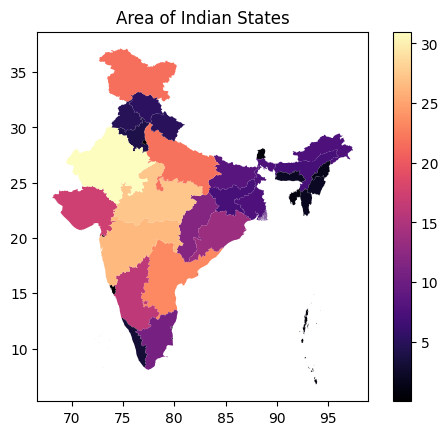

In [34]:
import matplotlib.pyplot as plt

gdf.plot('Area', cmap='magma', legend=True)
plt.title('Area of Indian States')
plt.show()

**Cresting Boundary**

In [35]:
gdf["Boundary"] = gdf.boundary
print(gdf["Boundary"])

ST_NAME
ANDAMAN AND NICOBAR ISLANDS    MULTILINESTRING ((92.89889 12.91583, 92.89917 ...
Andhra Pradesh                 MULTILINESTRING ((83.94319 18.21431, 83.94236 ...
Arunachal Pradesh              LINESTRING (94.86086 27.73948, 94.86603 27.736...
Assam                          LINESTRING (95.59917 27.22961, 95.59009 27.229...
Bihar                          LINESTRING (87.95561 25.53805, 87.95239 25.536...
CHANDIGARH                     LINESTRING (76.69267 30.74471, 76.69068 30.746...
Chhattisgarh                   MULTILINESTRING ((83.79799 22.28996, 83.79752 ...
DADRA AND NAGAR HAVELI         LINESTRING (72.98532 20.11345, 72.97963 20.125...
DAMAN AND DIU                  MULTILINESTRING ((70.96208 20.72208, 70.96347 ...
Goa                            LINESTRING (74.26171 14.99076, 74.26330 14.988...
Gujarat                        MULTILINESTRING ((74.06675 22.55090, 74.05628 ...
Haryana                        LINESTRING (77.36850 30.09156, 77.35698 30.084...
Himachal Pradesh    

In [36]:
#!pip install --upgrade matplotlib

**Plotting Boundary**

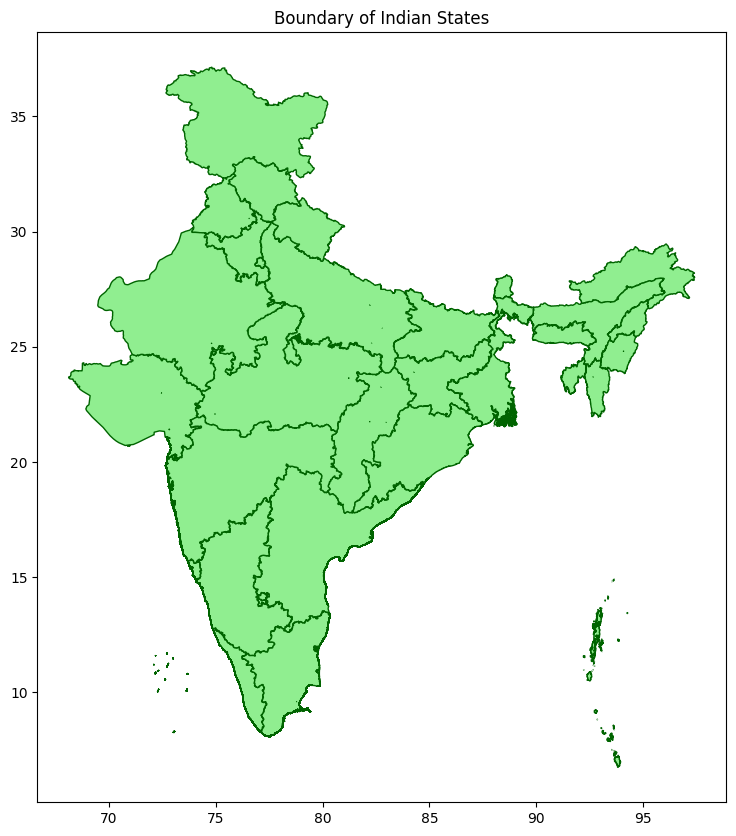

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.boundary.plot(ax=ax, edgecolor ='darkgreen', facecolor='lightgreen', linewidth =1)
plt.title('Boundary of Indian States')
plt.show()


**Creating Centroid**

In [38]:
gdf["Centroid"] = gdf.centroid
print(gdf["Centroid"])

ST_NAME
ANDAMAN AND NICOBAR ISLANDS    POINT (92.96817 11.22606)
Andhra Pradesh                 POINT (79.56407 16.58250)
Arunachal Pradesh              POINT (94.67515 28.03873)
Assam                          POINT (92.83036 26.35713)
Bihar                          POINT (85.60483 25.67965)
CHANDIGARH                     POINT (76.76828 30.73384)
Chhattisgarh                   POINT (82.03537 21.26470)
DADRA AND NAGAR HAVELI         POINT (73.08090 20.19474)
DAMAN AND DIU                  POINT (71.66120 20.60218)
Goa                            POINT (74.05788 15.35954)
Gujarat                        POINT (71.53179 22.67612)
Haryana                        POINT (76.33257 29.20036)
Himachal Pradesh               POINT (77.23331 31.92777)
Jammu And Kashmir              POINT (76.34820 34.64881)
Jharkhand                      POINT (85.55763 23.65454)
Karnataka                      POINT (76.16646 14.70517)
Kerala                         POINT (76.40061 10.45320)
LAKSHADWEEP            

<ipython-input-38-fe1d7da23a57>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["Centroid"] = gdf.centroid


**Plotting centroid within State Boundary**

<ipython-input-39-038fb37f4c91>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, marker='o', color='red', markersize=8)


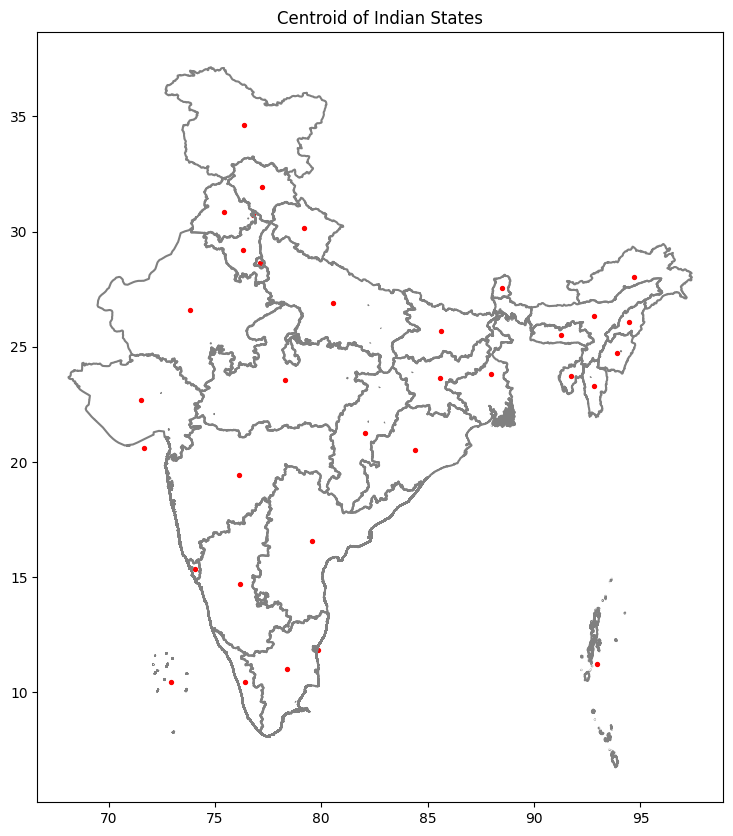

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.boundary.plot(ax=ax, color='Grey')
gdf.centroid.plot(ax=ax, marker='o', color='red', markersize=8)
plt.title('Centroid of Indian States')
plt.show()


**Trying to Plot Boundary and Its lebel or name of the states**

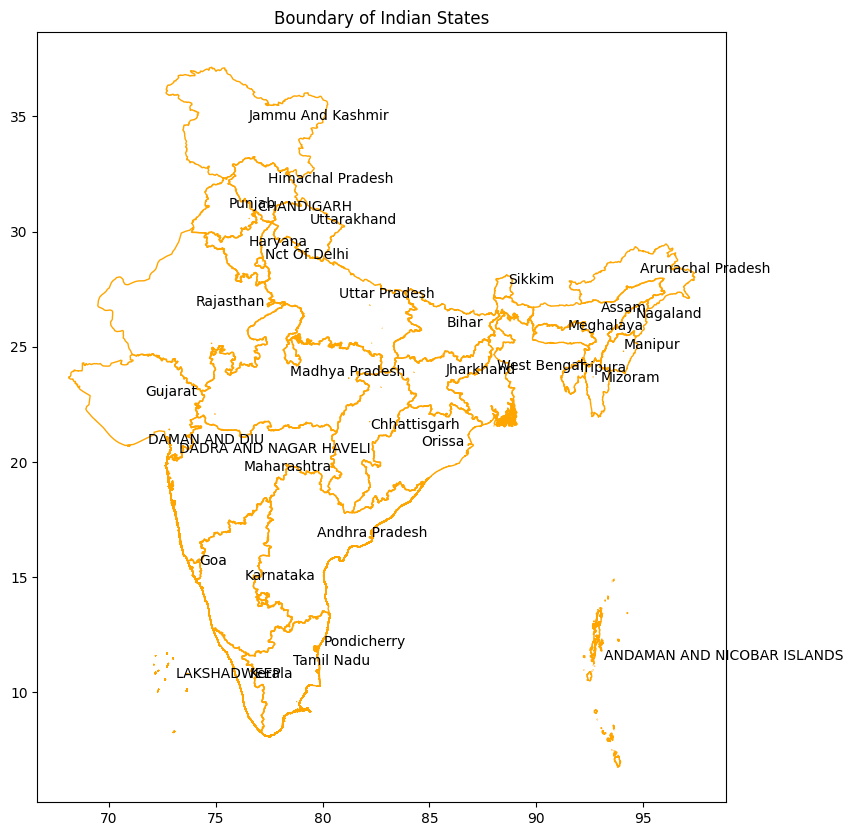

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.geometry.plot(ax=ax, edgecolor='orange', facecolor='none', linewidth=1)
plt.title('Boundary of Indian States')

# Looping over the rows of gdf and annotate each state
for index, row in gdf.iterrows():
    # importing Centroid of the state polygon to annotate the names
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    # As I have set my state name field as default Index I am setting Name as Index
    name = index
    # Annotate the state name with some offset and rotation
    ax.annotate(name, xy=(x, y), xytext=(3, 3), textcoords="offset points", rotation=0)

plt.show()


In [41]:
gdf.head(5)

,geometry,Area,Boundary,Centroid
ST_NAME,,,,
ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((92.89889 12.91583, 92.89917 12...",0.630493,"MULTILINESTRING ((92.89889 12.91583, 92.89917 ...",POINT (92.96817 11.22606)
Andhra Pradesh,"POLYGON ((83.94319 18.21431, 83.94236 18.21431...",23.315352,"MULTILINESTRING ((83.94319 18.21431, 83.94236 ...",POINT (79.56407 16.58250)
Arunachal Pradesh,"POLYGON ((94.86086 27.73948, 94.86603 27.73624...",7.529301,"LINESTRING (94.86086 27.73948, 94.86603 27.736...",POINT (94.67515 28.03873)
Assam,"POLYGON ((95.59917 27.22961, 95.59009 27.22952...",7.091648,"LINESTRING (95.59917 27.22961, 95.59009 27.229...",POINT (92.83036 26.35713)
Bihar,"POLYGON ((87.95561 25.53805, 87.95239 25.53646...",8.473771,"LINESTRING (87.95561 25.53805, 87.95239 25.536...",POINT (85.60483 25.67965)


In [42]:
gdf.to_csv('gdf.csv', index=False)


<h1><b>2. Create a data frame containing the lat- long of capitals (cities) of different states of India and convert it into geodataframe project it to EPSG: 3857 and plot the same. </b><h1>

In [43]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

**Importing csv file with the help of Pandas**

In [44]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Geopandas/ind_cap.csv')

**Reading dataset**

In [45]:
df.head(5)

,State,State Capital,cap_loc
0,Andaman and Nicobar Islands,Port Blair,"11.6667° N, 92.75° E"
1,Andhra Pradesh,Amaravati,"16.5001° N, 80.6667° E"
2,Arunachal Pradesh,Itanagar,"27.1000° N, 93.6167° E"
3,Assam,Dispur,"26.1667° N, 91.7667° E"
4,Bihar,Patna,"25.6167° N, 85.1333° E"


**Splitting 'cap_loc' location field into Lat and Long field**

In [46]:
df[['lat', 'long']] = df['cap_loc'].str.split(',', expand=True)


**Removing the Degree sign and 'N' letter to converting the values into Float**

In [47]:
df['lat'] = df['lat'].str.replace('° N', '').astype(float)
df['long'] = df['long'].str.replace('° E', '').astype(float)

In [48]:
df.head(5)

,State,State Capital,cap_loc,lat,long
0,Andaman and Nicobar Islands,Port Blair,"11.6667° N, 92.75° E",11.6667,92.7500
1,Andhra Pradesh,Amaravati,"16.5001° N, 80.6667° E",16.5001,80.6667
2,Arunachal Pradesh,Itanagar,"27.1000° N, 93.6167° E",27.1000,93.6167
3,Assam,Dispur,"26.1667° N, 91.7667° E",26.1667,91.7667
4,Bihar,Patna,"25.6167° N, 85.1333° E",25.6167,85.1333


**Adding a geometry field for Capital locations using Point geometry**

In [49]:
df['geometry'] = df.apply(lambda row: Point(row['long'], row['lat']), axis=1)

**Converting Pandas dataframe to GeoDataFrame & setting Geometry field as geometry**

In [50]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')

**checking if the dataframe is already having a Coordinate system of not**

In [51]:
print(gdf.crs)

None


**Now setting the CRS to EPSG:3857**

In [52]:
gdf = gdf.set_crs(epsg=3857)

In [53]:
print(gdf.crs)

EPSG:3857


**Plotting the Capital Locations**

<Axes: >

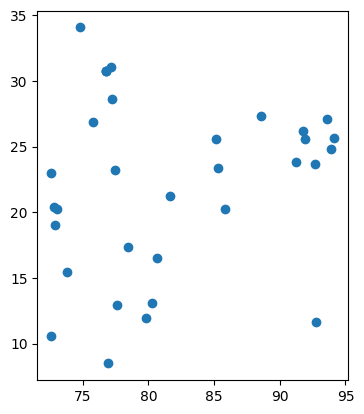

In [54]:
gdf.plot()

**Showing the final data**

In [55]:
gdf.head(5)

,State,State Capital,cap_loc,lat,long,geometry
0,Andaman and Nicobar Islands,Port Blair,"11.6667° N, 92.75° E",11.6667,92.7500,POINT (92.750 11.667)
1,Andhra Pradesh,Amaravati,"16.5001° N, 80.6667° E",16.5001,80.6667,POINT (80.667 16.500)
2,Arunachal Pradesh,Itanagar,"27.1000° N, 93.6167° E",27.1000,93.6167,POINT (93.617 27.100)
3,Assam,Dispur,"26.1667° N, 91.7667° E",26.1667,91.7667,POINT (91.767 26.167)
4,Bihar,Patna,"25.6167° N, 85.1333° E",25.6167,85.1333,POINT (85.133 25.617)


**Adding Indian_state boundary Geojson file (I have converted my shapefile into a geojson file using ogr2ogr library tool) for ploting Capitals into India state boundary map**

In [56]:
india = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas/india.json')
india.head(5)

,ST_NAME,geometry
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((92.89889 12.91583, 92.89917 12..."
1,Andhra Pradesh,"POLYGON ((83.94319 18.21431, 83.94236 18.21431..."
2,Arunachal Pradesh,"POLYGON ((94.86086 27.73948, 94.86603 27.73624..."
3,Assam,"POLYGON ((95.59917 27.22961, 95.59009 27.22952..."
4,Bihar,"POLYGON ((87.95561 25.53805, 87.95239 25.53646..."


**Plotting the map and Lebeling capital names using Zip() function and loop**

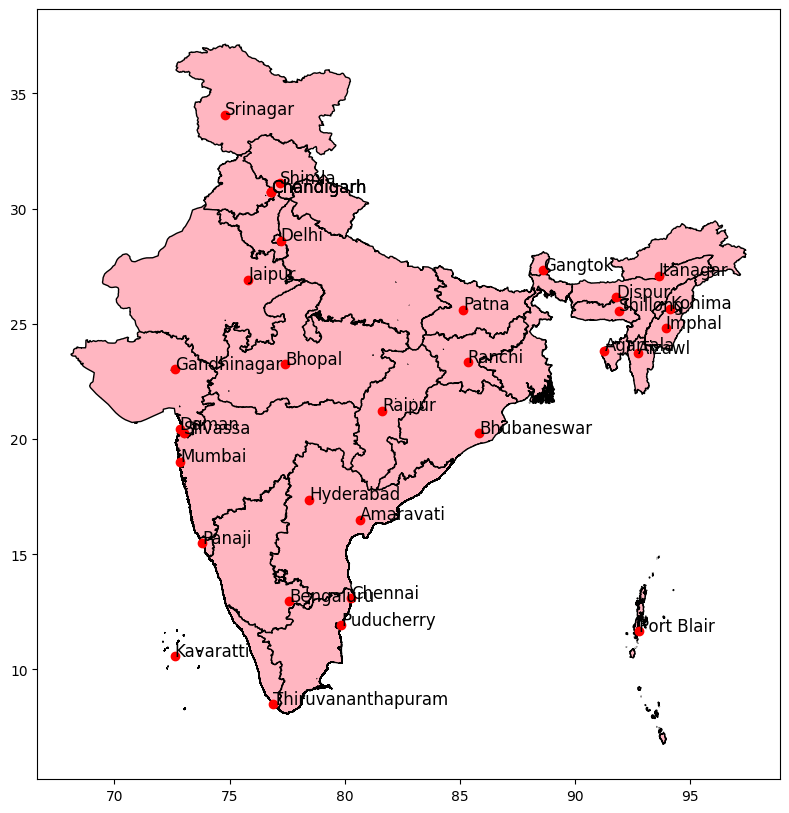

In [57]:
fig, ax = plt.subplots(figsize=(10, 10))
india.plot(ax=ax, color='lightpink', edgecolor='black')

gdf.plot(ax=ax, color='red')

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['State Capital']):
    ax.text(x, y, label, fontsize=12)

plt.show()

<h1><b>3. Write a program to read any shape file display its current coordinate system and re-project it to EPSG:4326 and plot the same.</h1><b>

**Adding a new shp dataset**

In [63]:
drn = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas/Drainage.shp')

**Old/Original coordinate system**

In [59]:
print(drn.crs)

EPSG:32643


**Re-projecting the crs to EPSG:4326**

In [64]:
new_crs = drn.to_crs(epsg = 4326)

In [65]:
print(new_crs.crs)

EPSG:4326


**Dataset**

In [66]:
new_crs.head(5)

,Id,order_,order1,geometry
0,0,1,1,"LINESTRING (77.55333 23.34347, 77.55322 23.343..."
1,0,1,1,"LINESTRING (77.54624 23.34413, 77.54628 23.344..."
2,0,2,2,"LINESTRING (77.54754 23.34150, 77.54753 23.341..."
3,0,1,1,"LINESTRING (77.56092 23.33580, 77.56090 23.335..."
4,0,1,1,"LINESTRING (77.56219 23.33199, 77.56206 23.331..."


**Plotting**

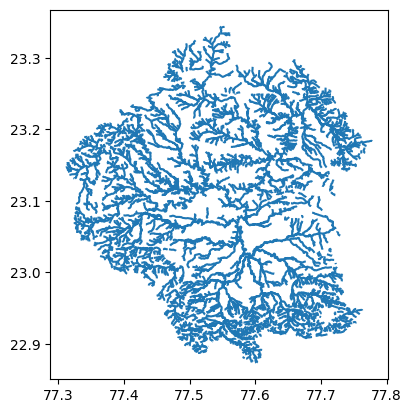

In [68]:
fig, ax = plt.subplots(1, 1)
new_crs.plot(ax=ax)
plt.show()